In [1]:
import re
import unicodedata
import numpy as np
import pandas as pd
#import tensorflow as tf
from IPython.display import display, HTML
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import os
from datetime import datetime, date

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
generate_from_scratch = True; #set to false if data has already been generated

In [3]:
if generate_from_scratch:
    counter = 0
    
    daily_dataset = pd.read_csv("data/daily_dataset.csv")
    informations_households = pd.read_csv("data/informations_households.csv")
    uk_bank_holidays = pd.read_csv("data/uk_bank_holidays.csv")
    weather_daily_darksky = pd.read_csv("data/weather_daily_darksky.csv")
        
    '''directory = 'data/daily_dataset'
    dfs = []
    for csv_file in os.listdir(directory):
        cur_df = pd.read_csv(os.path.join(directory, csv_file))
        counter += len(cur_df)
        dfs.append(cur_df)
 
    daily_dataset = pd.concat(dfs, ignore_index=True)
    daily_dataset.to_csv('data/daily_compiled.csv', index=False)

    print(counter)
    print(len(daily_dataset))'''

In [4]:
if generate_from_scratch:    
    daily_dataset['day'] = pd.to_datetime(daily_dataset['day'], format="%Y-%m-%d").dt.date
    weather_daily_darksky['day'] = pd.to_datetime(weather_daily_darksky['uvIndexTime'])
    weather_daily_darksky['day'] = pd.to_datetime(weather_daily_darksky.day, format='%Y-%m-%d').dt.date
    
    df_merge = daily_dataset.merge(weather_daily_darksky, on='day',how='left')
    
    styled_df = df_merge.head().to_html()
    styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
    display(HTML(styled_df))

In [5]:
if generate_from_scratch:        
    uk_bank_holidays['day'] = pd.to_datetime(uk_bank_holidays['Bank holidays'])
    uk_bank_holidays['day'] = pd.to_datetime(uk_bank_holidays['day'],format='%Y-%m-%d').dt.date
    
    df_merge = df_merge.merge(uk_bank_holidays, on='day',how='left')
    df_merge['Type'].fillna("Not holiday", inplace = True)
    df_merge['Bank holidays'].fillna("Not holiday", inplace = True)

    styled_df = df_merge.head().to_html()
    styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
    display(HTML(styled_df))
    #df_merged

In [6]:
if generate_from_scratch:            
    df_merge = df_merge.merge(informations_households, on='LCLid',how='left')
    
    df_merge.rename(columns={'Type':'Holiday'}, inplace=True)
    df_merge.drop(columns=['Bank holidays', 'file', 'time', 'temperatureMaxTime', 'temperatureMinTime',
                           'energy_median', 'energy_max', 'energy_count','energy_mean','energy_min', 'energy_std',
                           'apparentTemperatureMinTime', 'apparentTemperatureHighTime', 'stdorToU', 'uvIndexTime',
                           'sunsetTime', 'sunriseTime', 'temperatureHighTime', 'temperatureLowTime',
                           'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'summary'], inplace=True)

    df_merge.to_csv('accorn_compile.csv', index=False)

In [7]:
df = pd.read_csv("accorn_compile.csv")
df['day'] = pd.to_datetime(df['day'], format="%Y-%m-%d").dt.date
styled_df = df.head().to_html()
styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
display(HTML(styled_df))

,LCLid,day,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Holiday,Acorn,Acorn_grouped
0,MAC000131,2011-12-15,9.505,7.97,234.0,wind,2.41,0.42,4.71,996.75,4.25,rain,12.79,0.77,-2.58,4.38,1.0,1.80,4.08,7.97,1.07,0.66,Not holiday,ACORN-E,Affluent
1,MAC000131,2011-12-16,14.216,4.68,315.0,partly-cloudy-day,1.60,0.70,3.71,988.10,0.23,rain,10.96,0.88,-3.56,0.99,1.0,0.24,1.80,4.53,-2.65,0.70,Not holiday,ACORN-E,Affluent
2,MAC000131,2011-12-17,9.111,5.35,285.0,partly-cloudy-day,0.96,0.37,3.99,1008.46,1.72,rain,11.64,0.86,-4.12,1.72,1.0,-0.01,0.24,5.35,-3.56,0.73,Not holiday,ACORN-E,Affluent
3,MAC000131,2011-12-18,10.511,5.49,289.0,partly-cloudy-day,-0.31,0.22,3.60,1016.37,1.98,rain,13.04,0.84,-3.67,1.98,1.0,-0.84,-0.56,5.49,-4.12,0.77,Not holiday,ACORN-E,Affluent
4,MAC000131,2011-12-19,15.647,6.64,235.0,partly-cloudy-day,2.45,0.47,2.70,1014.39,4.02,rain,10.43,0.94,2.27,4.02,1.0,5.83,-0.84,6.64,-3.67,0.81,Not holiday,ACORN-E,Affluent


In [8]:
print(df.isnull().sum()) # Trying to find if there is any null data

LCLid                         0
day                           0
energy_sum                   30
temperatureMax             5099
windBearing                5099
icon                       5099
dewPoint                   5099
cloudCover                 5099
windSpeed                  5099
pressure                   5099
apparentTemperatureHigh    5099
precipType                 5099
visibility                 5099
humidity                   5099
apparentTemperatureLow     5099
apparentTemperatureMax     5099
uvIndex                    5099
temperatureLow             5099
temperatureMin             5099
temperatureHigh            5099
apparentTemperatureMin     5099
moonPhase                  5099
Holiday                       0
Acorn                         0
Acorn_grouped                 0
dtype: int64


In [9]:
rows_with_nans = df[df.isnull().any(axis=1)]

styled_df = rows_with_nans.head().to_html()
styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
display(HTML(styled_df))

,LCLid,day,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Holiday,Acorn,Acorn_grouped
748,MAC000131,2014-01-01,21.388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
1555,MAC000132,2014-01-01,17.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
2376,MAC000221,2014-01-01,8.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
3197,MAC000228,2014-01-01,6.561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
4018,MAC000234,2014-01-01,4.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent


In [10]:
rows_with_nans = df[df['energy_sum'].isnull()]

styled_df = rows_with_nans.head().to_html()
styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
display(HTML(styled_df))

,LCLid,day,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Holiday,Acorn,Acorn_grouped
37231,MAC000410,2012-12-18,NaN,7.96,291.0,partly-cloudy-day,4.36,0.62,2.17,1014.41,7.12,rain,11.65,0.86,0.96,7.12,0.0,3.07,4.66,7.96,2.47,0.19,Not holiday,ACORN-N,Adversity
129012,MAC005560,2012-12-19,NaN,7.44,119.0,partly-cloudy-day,4.27,0.52,4.02,1016.68,4.49,rain,7.87,0.92,2.59,4.49,1.0,6.44,3.07,7.44,0.96,0.22,Not holiday,ACORN-P,Adversity
138461,MAC002110,2012-12-18,NaN,7.96,291.0,partly-cloudy-day,4.36,0.62,2.17,1014.41,7.12,rain,11.65,0.86,0.96,7.12,0.0,3.07,4.66,7.96,2.47,0.19,Not holiday,ACORN-F,Comfortable
205939,MAC001065,2012-12-18,NaN,7.96,291.0,partly-cloudy-day,4.36,0.62,2.17,1014.41,7.12,rain,11.65,0.86,0.96,7.12,0.0,3.07,4.66,7.96,2.47,0.19,Not holiday,ACORN-K,Adversity
293243,MAC001229,2012-12-18,NaN,7.96,291.0,partly-cloudy-day,4.36,0.62,2.17,1014.41,7.12,rain,11.65,0.86,0.96,7.12,0.0,3.07,4.66,7.96,2.47,0.19,Not holiday,ACORN-H,Comfortable


In [11]:
df = df[(df['energy_sum'] != 0) & (~df['energy_sum'].isnull())]
# df['energy_std'].fillna(0, inplace=True)

In [12]:
print(df.isnull().sum()) # Trying to find if there is any null data

LCLid                         0
day                           0
energy_sum                    0
temperatureMax             5063
windBearing                5063
icon                       5063
dewPoint                   5063
cloudCover                 5063
windSpeed                  5063
pressure                   5063
apparentTemperatureHigh    5063
precipType                 5063
visibility                 5063
humidity                   5063
apparentTemperatureLow     5063
apparentTemperatureMax     5063
uvIndex                    5063
temperatureLow             5063
temperatureMin             5063
temperatureHigh            5063
apparentTemperatureMin     5063
moonPhase                  5063
Holiday                       0
Acorn                         0
Acorn_grouped                 0
dtype: int64


In [13]:
rows_with_nans = df[df.isnull().any(axis=1)]

styled_df = rows_with_nans.head().to_html()
styled_df = f'<div style="overflow-x:auto;">{styled_df}</div>'
display(HTML(styled_df))

,LCLid,day,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Holiday,Acorn,Acorn_grouped
748,MAC000131,2014-01-01,21.388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
1555,MAC000132,2014-01-01,17.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
2376,MAC000221,2014-01-01,8.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
3197,MAC000228,2014-01-01,6.561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent
4018,MAC000234,2014-01-01,4.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Year?s Day,ACORN-E,Affluent


In [14]:
print(len(df))

3495265


In [15]:
df.dropna(inplace=True)

In [16]:
print(len(df))

3490202


In [17]:
print(df.isnull().sum()) # Trying to find if there is any null data

LCLid                      0
day                        0
energy_sum                 0
temperatureMax             0
windBearing                0
icon                       0
dewPoint                   0
cloudCover                 0
windSpeed                  0
pressure                   0
apparentTemperatureHigh    0
precipType                 0
visibility                 0
humidity                   0
apparentTemperatureLow     0
apparentTemperatureMax     0
uvIndex                    0
temperatureLow             0
temperatureMin             0
temperatureHigh            0
apparentTemperatureMin     0
moonPhase                  0
Holiday                    0
Acorn                      0
Acorn_grouped              0
dtype: int64


# Clustering

Data Manipulation for clustering

In [86]:
#!pip install kmodes
X = df.drop(['LCLid', 'Acorn','Acorn_grouped', 'temperatureLow', 'temperatureHigh','apparentTemperatureLow', 'apparentTemperatureHigh', 'moonPhase'], axis = 1).groupby('day').first().reset_index().drop('day', axis = 1) #'apparentTemperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureMax', 'apparentTemperatureMin'], axis = 1).groupby('day').first().reset_index().drop('day', axis = 1)
X["Holiday"] = np.where(X['Holiday'] == 'Not Holiday','Not Holiday','Holiday')


In [87]:
X.columns

Index(['energy_sum', 'temperatureMax', 'windBearing', 'icon', 'dewPoint',
       'cloudCover', 'windSpeed', 'pressure', 'precipType', 'visibility',
       'humidity', 'apparentTemperatureMax', 'uvIndex', 'temperatureMin',
       'apparentTemperatureMin', 'Holiday'],
      dtype='object')

In [88]:
temp_kprop = X.copy()

<Axes: xlabel='icon', ylabel='energy_sum'>

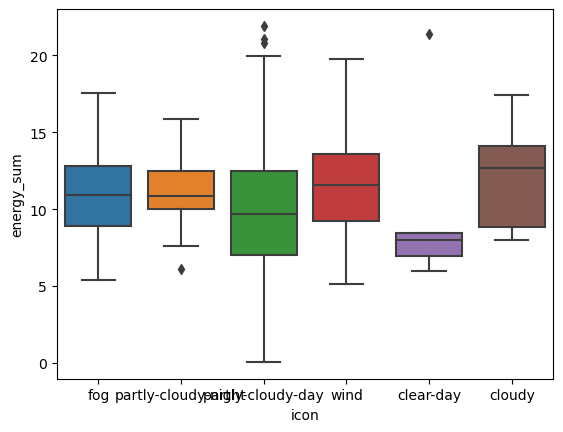

In [89]:
import seaborn as sns

sns.boxplot(x='icon', y='energy_sum', data=X)

## KPrototypes 

In [90]:


# Assuming you have your dataset stored in X, where X contains both numerical and categorical variables

# Define the range of cluster numbers you want to try
min_clusters = 2
max_clusters = 15


n = len(X.columns)

# Define the indices of the categorical columns in X
categorical_columns = [3,8,15]  # Adjust the indices as per your dataset

# Extract the numerical columns from X
numerical_columns = list(set(range(0,n)) - set(categorical_columns))  # Adjust the indices as per your dataset
X_numerical = X.iloc[:, numerical_columns]

# Scale the numerical variables
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X.iloc[:, numerical_columns] = X_numerical_scaled

# Initialize variables to store optimal values
silhouette_avg = []

# Perform K-prototypes clustering for different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang', n_jobs = -1)  # Adjust initialization method as needed
    clusters = kproto.fit_predict(X, categorical=categorical_columns)
    silhouette_avg.append(silhouette_score(X_numerical_scaled, clusters))
    

# Access the cluster centroids and labels from the best clustering result
cluster_centroids = kproto.cluster_centroids_
labels = kproto.labels_

In [91]:
clusters = range(min_clusters, max_clusters+1)
fig = px.line( x = clusters,y= silhouette_avg)
fig.update_layout(
    title="Silhouette Score",
    xaxis_title="Number of Clusters",
    yaxis_title="Score",
)
fig.show()

In [92]:
kproto = KPrototypes(n_clusters=clusters[np.argmax(silhouette_avg)], init='Huang', n_jobs = -1)  # Adjust initialization method as needed
clusters = kproto.fit_predict(X, categorical=categorical_columns)
silhouette_avg.append(silhouette_score(X_numerical_scaled, clusters))
    

# Access the cluster centroids and labels from the best clustering result
cluster_centroids = kproto.cluster_centroids_
labels = kproto.labels_

In [93]:
temp_kprop['cluster'] = clusters

In [94]:
temp_kprop

,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,precipType,visibility,humidity,apparentTemperatureMax,uvIndex,temperatureMin,apparentTemperatureMin,Holiday,cluster
0,5.969,10.36,229.0,fog,6.29,0.36,2.04,1027.12,rain,8.06,0.93,10.36,1.0,3.81,2.18,Holiday,0
1,8.394,12.93,204.0,partly-cloudy-night,8.56,0.41,4.04,1027.22,rain,10.64,0.89,12.93,1.0,8.56,7.01,Holiday,0
2,12.876,13.03,243.0,partly-cloudy-day,7.24,0.48,5.02,1024.47,rain,12.38,0.79,13.03,1.0,7.46,4.84,Holiday,0
3,15.002,12.96,237.0,wind,6.96,0.44,5.75,1025.80,rain,13.07,0.81,12.96,1.0,7.01,4.69,Holiday,0
4,12.800,13.54,256.0,wind,5.76,0.42,5.48,1021.11,rain,13.08,0.72,13.54,1.0,4.47,2.94,Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,12.247,14.23,183.0,wind,6.03,0.50,5.02,1005.19,rain,13.00,0.74,14.23,1.0,7.99,5.52,Holiday,0
824,14.182,11.43,202.0,partly-cloudy-day,5.06,0.62,5.69,1000.65,rain,12.09,0.78,11.43,1.0,6.79,3.89,Holiday,0
825,11.302,11.29,227.0,partly-cloudy-day,2.74,0.26,3.82,1012.73,rain,13.00,0.73,11.29,2.0,4.17,1.67,Holiday,0
826,13.299,10.31,224.0,partly-cloudy-day,3.08,0.32,4.14,1007.02,rain,12.04,0.74,10.31,2.0,3.93,1.41,Holiday,0


In [95]:
temp = temp_kprop.drop(['icon'], axis = 1)
fig = make_subplots(rows=5, cols=3,x_title= 'cluster',subplot_titles=temp.drop(['cluster'], axis = 1).columns)

for i,col in enumerate(temp.drop(['cluster'], axis = 1)):
    q, mod = divmod(i, 3)
    for t in px.box(temp, x="cluster", y=col, color="cluster").data:
        fig.add_trace(t, row=q+1, col=mod+1)
    #trace= go.Box(y=weather_hol.drop('holiday_id', axis = 1)[col],x=weather_hol.drop('holiday_id', axis = 1)['cluster'])
    #fig.add_trace(trace, row = q+1, col = mod+1)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
    )
fig.update_traces(showlegend=False)
fig.show()

# PCA

Determining important features

In [96]:
# Step 1: Perform PCA
pca_kprop = PCA()
#X = weather_hol.drop(['day'], axis = 1)
#scaler = MinMaxScaler()
#pca_scaled = scaler.fit_transform(X)
pca_kprop.fit(X_numerical_scaled)

# Step 2: Obtain the Loadings
loadings = pca_kprop.components_

# Step 3: Absolute Value of Loadings
abs_loadings = np.abs(loadings)

# Step 4: Summarize Loadings
sum_loadings = np.sum(abs_loadings, axis=0)

# Step 5: Rank the Variables
ranked_indices = np.argsort(sum_loadings)[::-1]
ranked_features = np.array(X_numerical.columns)[ranked_indices]  # If you have feature names, replace 'feature_names' with your own list

# Print the ranked features
print("Ranked Features:")
for feature in ranked_features:
    print(feature)

Ranked Features:
temperatureMin
dewPoint
humidity
cloudCover
windSpeed
temperatureMax
apparentTemperatureMax
pressure
uvIndex
apparentTemperatureMin
visibility
windBearing
energy_sum


### Attempt to visualize KPrototypes clustering in two dimensions

In [97]:
res = pca_kprop.transform(X_numerical_scaled)
fig = px.scatter(
    res, x=0, y=1,
    color=labels, labels={'color': 'Cluster'}
)
fig.update_layout(
    title="PCA visualization of Energy Consumption",
    xaxis_title="First Component",
    yaxis_title="Second Component",
    width=700,
    height=500
)

fig.show()

# KMEANS

### Data Manipulation for KMeans

In [98]:
df

,LCLid,day,energy_sum,temperatureMax,windBearing,icon,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Holiday,Acorn,Acorn_grouped
0,MAC000131,2011-12-15,9.505,7.97,234.0,wind,2.41,0.42,4.71,996.75,...,4.38,1.0,1.80,4.08,7.97,1.07,0.66,Not holiday,ACORN-E,Affluent
1,MAC000131,2011-12-16,14.216,4.68,315.0,partly-cloudy-day,1.60,0.70,3.71,988.10,...,0.99,1.0,0.24,1.80,4.53,-2.65,0.70,Not holiday,ACORN-E,Affluent
2,MAC000131,2011-12-17,9.111,5.35,285.0,partly-cloudy-day,0.96,0.37,3.99,1008.46,...,1.72,1.0,-0.01,0.24,5.35,-3.56,0.73,Not holiday,ACORN-E,Affluent
3,MAC000131,2011-12-18,10.511,5.49,289.0,partly-cloudy-day,-0.31,0.22,3.60,1016.37,...,1.98,1.0,-0.84,-0.56,5.49,-4.12,0.77,Not holiday,ACORN-E,Affluent
4,MAC000131,2011-12-19,15.647,6.64,235.0,partly-cloudy-day,2.45,0.47,2.70,1014.39,...,4.02,1.0,5.83,-0.84,6.64,-3.67,0.81,Not holiday,ACORN-E,Affluent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510428,MAC004977,2014-02-24,5.686,14.23,183.0,wind,6.03,0.50,5.02,1005.19,...,14.23,1.0,8.25,7.99,14.23,5.52,0.82,Not holiday,ACORN-E,Affluent
3510429,MAC004977,2014-02-25,4.042,11.43,202.0,partly-cloudy-day,5.06,0.62,5.69,1000.65,...,11.43,1.0,4.17,6.79,10.31,3.89,0.86,Not holiday,ACORN-E,Affluent
3510430,MAC004977,2014-02-26,5.784,11.29,227.0,partly-cloudy-day,2.74,0.26,3.82,1012.73,...,11.29,2.0,6.01,4.17,11.29,1.67,0.90,Not holiday,ACORN-E,Affluent
3510431,MAC004977,2014-02-27,5.475,10.31,224.0,partly-cloudy-day,3.08,0.32,4.14,1007.02,...,10.31,2.0,3.43,3.93,10.31,1.41,0.93,Not holiday,ACORN-E,Affluent


In [99]:
df.columns

Index(['LCLid', 'day', 'energy_sum', 'temperatureMax', 'windBearing', 'icon',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'Holiday', 'Acorn',
       'Acorn_grouped'],
      dtype='object')

In [100]:
weather_df = df[["temperatureMax",'apparentTemperatureMin', 
                         "windBearing",
                         "dewPoint",
                         "cloudCover",
                         "windSpeed", 
                         "temperatureMin",'apparentTemperatureMax','pressure',#'apparentTemperatureMin',
       #'apparentTemperatureLow', 'apparentTemperatureMax',
                         "visibility",
                         "precipType",
                         "day",
                         "humidity", 'uvIndex']].groupby('day').first().reset_index()


weather_df["precipType"] = np.where(weather_df['precipType'] == 'rain',0,1)
weather_df

,day,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex
0,2011-11-23,10.36,2.18,229.0,6.29,0.36,2.04,3.81,10.36,1027.12,8.06,0,0.93,1.0
1,2011-11-24,12.93,7.01,204.0,8.56,0.41,4.04,8.56,12.93,1027.22,10.64,0,0.89,1.0
2,2011-11-25,13.03,4.84,243.0,7.24,0.48,5.02,7.46,13.03,1024.47,12.38,0,0.79,1.0
3,2011-11-26,12.96,4.69,237.0,6.96,0.44,5.75,7.01,12.96,1025.80,13.07,0,0.81,1.0
4,2011-11-27,13.54,2.94,256.0,5.76,0.42,5.48,4.47,13.54,1021.11,13.08,0,0.72,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,14.23,5.52,183.0,6.03,0.50,5.02,7.99,14.23,1005.19,13.00,0,0.74,1.0
824,2014-02-25,11.43,3.89,202.0,5.06,0.62,5.69,6.79,11.43,1000.65,12.09,0,0.78,1.0
825,2014-02-26,11.29,1.67,227.0,2.74,0.26,3.82,4.17,11.29,1012.73,13.00,0,0.73,2.0
826,2014-02-27,10.31,1.41,224.0,3.08,0.32,4.14,3.93,10.31,1007.02,12.04,0,0.74,2.0


In [101]:
energy_sum = df[['day', 'energy_sum']].groupby('day').sum().reset_index()
#energy_sum["day"] = pd.to_datetime(energy_sum["day"])

df["holiday_id"] = np.where(df['Holiday'] == 'Not holiday',0,1)
holiday = df[['day','holiday_id']].groupby('day').first().reset_index()

df_hol = energy_sum.merge(holiday, on="day", how= 'left')

weather_hol = weather_df.merge(df_hol, on = 'day', how= 'right')

#### Correlation 

In [102]:
#df[df['day']== df['day'].values[0]]#.loc[:, df.select_dtypes(exclude=['object']).columns.tolist()]
weather_hol.drop('day', axis = 1).corr()

,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex,energy_sum,holiday_id
temperatureMax,1.000000,0.910826,0.064435,0.865038,-0.333409,-0.153602,0.895553,0.989663,0.118933,0.259108,-0.303610,-0.404899,0.696497,-0.188667,-0.010260
apparentTemperatureMin,0.910826,1.000000,0.055982,0.940424,-0.102082,-0.132311,0.982479,0.911785,0.057641,0.151731,-0.283254,-0.198098,0.621782,-0.138753,-0.027783
windBearing,0.064435,0.055982,1.000000,0.095438,-0.081992,0.073646,0.067540,0.075660,-0.012078,0.259244,-0.164036,0.023066,-0.091269,-0.103097,-0.047937
dewPoint,0.865038,0.940424,0.095438,1.000000,-0.025207,-0.092212,0.938802,0.874313,-0.028121,0.042633,-0.321028,0.055514,0.486692,-0.126058,-0.031048
cloudCover,-0.333409,-0.102082,-0.081992,-0.025207,1.000000,0.170235,-0.060703,-0.305912,-0.101079,-0.330177,0.081652,0.480056,-0.248695,0.128811,-0.017075
windSpeed,-0.153602,-0.132311,0.073646,-0.092212,0.170235,1.000000,-0.021707,-0.173828,-0.344354,0.281088,-0.038412,-0.042391,-0.152634,0.045740,-0.017719
temperatureMin,0.895553,0.982479,0.067540,0.938802,-0.060703,-0.021707,1.000000,0.890912,0.006075,0.191180,-0.296337,-0.203930,0.598742,-0.141948,-0.020337
apparentTemperatureMax,0.989663,0.911785,0.075660,0.874313,-0.305912,-0.173828,0.890912,1.000000,0.125863,0.229987,-0.302023,-0.362098,0.678956,-0.204442,-0.018477
pressure,0.118933,0.057641,-0.012078,-0.028121,-0.101079,-0.344354,0.006075,0.125863,1.000000,-0.012508,0.093630,-0.250941,0.100774,-0.275245,-0.017218
visibility,0.259108,0.151731,0.259244,0.042633,-0.330177,0.281088,0.191180,0.229987,-0.012508,1.000000,-0.161174,-0.578130,0.240485,-0.116749,0.067067


In [103]:
dataset1 = weather_hol.drop('day', axis = 1)

### KMEANS: Non-reduced dataset

In [104]:
sillhoute_scores = []
n_cluster_list = np.arange(2,15).astype(int)

X1 = dataset1.values
centers_dict = {}
    
# Very important to scale!
sc = StandardScaler()
X1 = sc.fit_transform(X1)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state = 42)
    cluster_found = kmeans.fit(X1)
    sillhoute_scores.append(silhouette_score(X1, kmeans.labels_))
    if n_cluster <= 6:
        centers = kmeans.cluster_centers_
        centers_dict['cluster'+str(n_cluster)] = sc.inverse_transform(centers)
        cluster_found = kmeans.predict(X1)
        dataset1['cluster'+str(n_cluster)] = cluster_found
        dataset1['cluster'+str(n_cluster)] = dataset1['cluster'+str(n_cluster)].apply(str)
    #print(sillhoute_scores)

In [105]:
fig = px.line( x = n_cluster_list,y= sillhoute_scores)
fig.update_layout(
    title="Silhouette Score",
    xaxis_title="Number of Clusters",
    yaxis_title="Score",
)
fig.show()

In [106]:
dataset1.to_csv('kmeans.csv', index=False)

#### Choices for user:

In [107]:
col1 = 'energy_sum'
#person can choose col2 on website to compare with energy_sum maybe?
col2 = 'temperatureMax'
cluster = 'cluster2'

## PCA for visualization: Scatterplot

In [108]:
pca = PCA(n_components=2, random_state=42)
#scaler = StandardScaler()
#dataset1_scaled = scaler.fit_transform(dataset1.drop(['level_0','cluster'], axis =1))
results_pca = pca.fit_transform(X1)

In [109]:
dataset1

,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex,energy_sum,holiday_id,cluster2,cluster3,cluster4,cluster5,cluster6
0,10.36,2.18,229.0,6.29,0.36,2.04,3.81,10.36,1027.12,8.06,0,0.93,1.0,90.385000,0,1,2,3,4,3
1,12.93,7.01,204.0,8.56,0.41,4.04,8.56,12.93,1027.22,10.64,0,0.89,1.0,213.412000,0,1,2,3,4,3
2,13.03,4.84,243.0,7.24,0.48,5.02,7.46,13.03,1024.47,12.38,0,0.79,1.0,303.993000,0,1,2,3,4,3
3,12.96,4.69,237.0,6.96,0.44,5.75,7.01,12.96,1025.80,13.07,0,0.81,1.0,420.976000,0,1,2,3,4,3
4,13.54,2.94,256.0,5.76,0.42,5.48,4.47,13.54,1021.11,13.08,0,0.72,1.0,444.883001,0,1,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,14.23,5.52,183.0,6.03,0.50,5.02,7.99,14.23,1005.19,13.00,0,0.74,1.0,51994.547004,0,1,2,3,4,1
824,11.43,3.89,202.0,5.06,0.62,5.69,6.79,11.43,1000.65,12.09,0,0.78,1.0,51423.508001,0,1,2,0,0,1
825,11.29,1.67,227.0,2.74,0.26,3.82,4.17,11.29,1012.73,13.00,0,0.73,2.0,50943.305995,0,1,2,0,0,1
826,10.31,1.41,224.0,3.08,0.32,4.14,3.93,10.31,1007.02,12.04,0,0.74,2.0,51678.185998,0,1,2,0,0,1


In [110]:
fig = px.scatter(
    results_pca, x=0, y=1,
    color=dataset1[cluster], labels={'color': 'Cluster'}
)
fig.update_layout(
    #title="Non-reduced dataset",
    xaxis_title=col1,
    yaxis_title=col2,
    width=800,
    height=500
)
fig.show()

In [111]:
temp = dataset1.drop(['cluster3', 'cluster4','cluster5','cluster6','precipType', 'holiday_id'], axis = 1)
fig = make_subplots(rows=4, cols=4,x_title= 'cluster',subplot_titles=temp.drop(['cluster2'], axis = 1).columns)

for i,col in enumerate(temp.drop(['cluster2'], axis = 1)):
    q, mod = divmod(i, 4)
    for t in px.box(temp, x="cluster2", y=col, color="cluster2").data:
        fig.add_trace(t, row=q+1, col=mod+1)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
    )
fig.update_traces(showlegend=False)
fig.show()

In [112]:
fig = px.scatter(
    dataset1, x=col1, y=col2,
    color=dataset1[cluster], labels={'color': 'Cluster'}
)
fig.update_layout(
    #title="Non-reduced dataset",
    xaxis_title=col1,
    yaxis_title=col2,
    width=800,
    height=500
)
fig.show()

## Visualizing clusters by feature: boxplot

In [113]:
dataset1

,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex,energy_sum,holiday_id,cluster2,cluster3,cluster4,cluster5,cluster6
0,10.36,2.18,229.0,6.29,0.36,2.04,3.81,10.36,1027.12,8.06,0,0.93,1.0,90.385000,0,1,2,3,4,3
1,12.93,7.01,204.0,8.56,0.41,4.04,8.56,12.93,1027.22,10.64,0,0.89,1.0,213.412000,0,1,2,3,4,3
2,13.03,4.84,243.0,7.24,0.48,5.02,7.46,13.03,1024.47,12.38,0,0.79,1.0,303.993000,0,1,2,3,4,3
3,12.96,4.69,237.0,6.96,0.44,5.75,7.01,12.96,1025.80,13.07,0,0.81,1.0,420.976000,0,1,2,3,4,3
4,13.54,2.94,256.0,5.76,0.42,5.48,4.47,13.54,1021.11,13.08,0,0.72,1.0,444.883001,0,1,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,14.23,5.52,183.0,6.03,0.50,5.02,7.99,14.23,1005.19,13.00,0,0.74,1.0,51994.547004,0,1,2,3,4,1
824,11.43,3.89,202.0,5.06,0.62,5.69,6.79,11.43,1000.65,12.09,0,0.78,1.0,51423.508001,0,1,2,0,0,1
825,11.29,1.67,227.0,2.74,0.26,3.82,4.17,11.29,1012.73,13.00,0,0.73,2.0,50943.305995,0,1,2,0,0,1
826,10.31,1.41,224.0,3.08,0.32,4.14,3.93,10.31,1007.02,12.04,0,0.74,2.0,51678.185998,0,1,2,0,0,1


In [114]:

fig = make_subplots(rows=1, cols=2,x_title= 'cluster',subplot_titles=[col1, col2])

for i,col in enumerate([col1,col2]):
    q, mod = divmod(i, 2)
    temp_fig = px.box(dataset1, x=cluster, y=col, color=cluster)
    for t in temp_fig.data:
        fig.add_trace(t, row=q+1, col=mod+1)
fig.update_layout(
    autosize=False,
    width=800,
    height=400
    )
fig.update_traces(showlegend=False)
fig.show()

## Visualizing custer centers: Barchart

In [115]:
centers_dataframe = pd.DataFrame(centers_dict[cluster], columns = dataset1.columns[:-5])
centers_dataframe['cluster'] = range(len(centers_dict[cluster]))
centers_dataframe['cluster'] = centers_dataframe['cluster'].apply(str)
centers_dataframe

,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex,energy_sum,holiday_id,cluster
0,20.032758,11.871030,200.157576,10.768364,0.424000,3.294788,12.196152,20.052970,1016.222242,11.913848,-2.775558e-17,0.733879,4.260606,39908.675190,0.021212,0
1,9.475944,1.726928,196.502008,3.745502,0.516506,3.805462,4.312028,8.185402,1012.627129,10.890562,4.016064e-02,0.811285,1.485944,44793.633746,0.020080,1


In [116]:

fig = make_subplots(rows=1, cols=2,x_title= 'cluster',subplot_titles=[col1, col2])

for i,col in enumerate([col1,col2]):
    q, mod = divmod(i, 2)
    #print(col)
    #if (col != "cluster"):
    temp_fig = px.bar(centers_dataframe, x='cluster', y=col, color='cluster')
    for t in temp_fig.data:
        fig.add_trace(t, row=q+1, col=mod+1)
fig.update_layout(
    autosize=False,
    width=800,
    height=400
    )
fig.update_traces(showlegend=False)
fig.update_coloraxes(showscale=False)
fig.show()

# PCA for KMeans

Determing important features

In [117]:
# Step 1: Perform PCA
pca_kmeans = PCA(random_state = 42)
X = weather_hol.drop(['day'], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_kmeans.fit(X_scaled)

# Step 2: Obtain the Loadings
loadings = pca_kmeans.components_

# Step 3: Absolute Value of Loadings
abs_loadings = np.abs(loadings)

# Step 4: Summarize Loadings
sum_loadings = np.sum(abs_loadings, axis=0)

# Step 5: Rank the Variables
ranked_indices = np.argsort(sum_loadings)[::-1]
ranked_features = np.array(X.columns)[ranked_indices]  # If you have feature names, replace 'feature_names' with your own list

# Print the ranked features
print("Ranked Features:")
for feature in ranked_features:
    print(feature)

Ranked Features:
temperatureMin
humidity
dewPoint
cloudCover
pressure
windSpeed
energy_sum
uvIndex
temperatureMax
windBearing
apparentTemperatureMin
precipType
apparentTemperatureMax
visibility
holiday_id


### Explained variance 

In [118]:
eigenvalues = pca_kmeans.explained_variance_
explained_variance_ratio = pca_kmeans.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

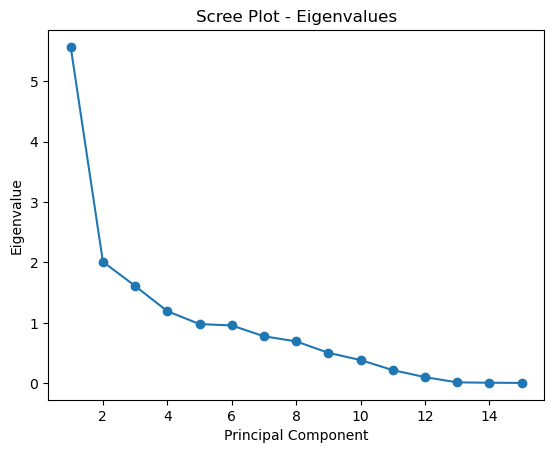

In [119]:
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot - Eigenvalues')
plt.show()

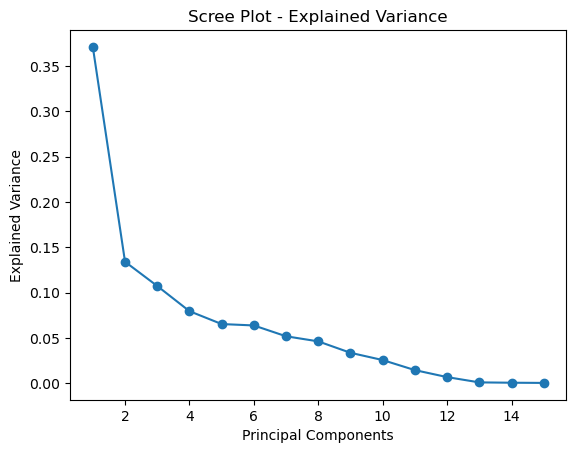

In [120]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot - Explained Variance')
plt.show()

In [121]:
variance_explained = pca_kmeans.explained_variance_ratio_

# Print the variance explained by each component
print("Variance Explained by Each Component:")
for i, variance in enumerate(variance_explained):
    print(f"Component {i+1}: {variance:.4f}")

Variance Explained by Each Component:
Component 1: 0.3709
Component 2: 0.1339
Component 3: 0.1072
Component 4: 0.0794
Component 5: 0.0652
Component 6: 0.0637
Component 7: 0.0517
Component 8: 0.0461
Component 9: 0.0335
Component 10: 0.0255
Component 11: 0.0144
Component 12: 0.0067
Component 13: 0.0009
Component 14: 0.0005
Component 15: 0.0003


In [122]:
dataset2 = pca_kmeans.transform(X_scaled)[:, :5]

## KMeans: PCA-reduced dataset

In [123]:
sillhoute_scores = []
n_cluster_list = np.arange(2,15).astype(int)

X = dataset2
    
# Very important to scale!
#sc = StandardScaler()
#X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=42)
    cluster_found = kmeans.fit(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))
    #print(sillhoute_scores)

In [124]:
fig = px.line( x = n_cluster_list,y= sillhoute_scores)
fig.update_layout(
    title="Silhouette Score",
    xaxis_title="Number of Clusters",
    yaxis_title="Score",
)
fig.show()

In [125]:
kmeans2 = KMeans(n_clusters=n_cluster_list[np.argmax(sillhoute_scores)], n_init=10)
cluster_found = kmeans2.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
dataset2 =pd.DataFrame(dataset2).set_index(cluster_found_sr, append=True )

In [126]:
temp_pca = weather_hol.drop('day', axis = 1)
temp_pca['cluster_pca'] = cluster_found

In [127]:
temp_pca

,temperatureMax,apparentTemperatureMin,windBearing,dewPoint,cloudCover,windSpeed,temperatureMin,apparentTemperatureMax,pressure,visibility,precipType,humidity,uvIndex,energy_sum,holiday_id,cluster_pca
0,10.36,2.18,229.0,6.29,0.36,2.04,3.81,10.36,1027.12,8.06,0,0.93,1.0,90.385000,0,0
1,12.93,7.01,204.0,8.56,0.41,4.04,8.56,12.93,1027.22,10.64,0,0.89,1.0,213.412000,0,0
2,13.03,4.84,243.0,7.24,0.48,5.02,7.46,13.03,1024.47,12.38,0,0.79,1.0,303.993000,0,0
3,12.96,4.69,237.0,6.96,0.44,5.75,7.01,12.96,1025.80,13.07,0,0.81,1.0,420.976000,0,0
4,13.54,2.94,256.0,5.76,0.42,5.48,4.47,13.54,1021.11,13.08,0,0.72,1.0,444.883001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,14.23,5.52,183.0,6.03,0.50,5.02,7.99,14.23,1005.19,13.00,0,0.74,1.0,51994.547004,0,0
824,11.43,3.89,202.0,5.06,0.62,5.69,6.79,11.43,1000.65,12.09,0,0.78,1.0,51423.508001,0,0
825,11.29,1.67,227.0,2.74,0.26,3.82,4.17,11.29,1012.73,13.00,0,0.73,2.0,50943.305995,0,0
826,10.31,1.41,224.0,3.08,0.32,4.14,3.93,10.31,1007.02,12.04,0,0.74,2.0,51678.185998,0,0


In [128]:
dataset2.reset_index(inplace = True)
dataset2['cluster'] = dataset2['cluster'].apply(str)

In [129]:
dataset2

,level_0,cluster,0,1,2,3,4
0,0,0,1.179441,0.460664,1.876179,-2.330519,0.570940
1,1,0,-0.100126,0.301974,0.754962,-1.869260,0.174141
2,2,0,0.009153,-0.644778,-0.159084,-1.783739,-0.014265
3,3,0,0.077056,-0.827245,-0.430409,-1.769128,-0.071752
4,4,0,0.235955,-1.539247,-0.578502,-1.613590,-0.118266
...,...,...,...,...,...,...,...
823,823,0,0.133880,-0.135997,-1.359210,0.451149,-0.316702
824,824,0,0.988872,0.443034,-1.737081,0.373632,-0.344281
825,825,0,0.841522,-1.488751,-0.576852,-0.068655,-0.016521
826,826,0,1.127946,-0.984788,-0.802542,0.118569,-0.084283


In [130]:
fig = px.scatter(
    dataset2.loc[:,[0,1]], x=0, y=1,
    color=dataset2.cluster, labels={'color': 'Cluster'}
)
fig.update_layout(
    #title="PCA visualization of Clustering: PCA-reduced dataset",
    xaxis_title="First Component",
    yaxis_title="Second Component",
    width=800,
    height=500
)
fig.show()

In [131]:
#temp = temp_kprop.drop(['icon'], axis = 1)
fig = make_subplots(rows=5, cols=3,x_title= 'cluster',subplot_titles=temp_pca.drop(['cluster_pca'], axis = 1).columns)

for i,col in enumerate(temp_pca.drop(['cluster_pca'], axis = 1)):
    q, mod = divmod(i, 3)
    for t in px.box(temp_pca, x="cluster_pca", y=col, color="cluster_pca").data:
        fig.add_trace(t, row=q+1, col=mod+1)
    #trace= go.Box(y=weather_hol.drop('holiday_id', axis = 1)[col],x=weather_hol.drop('holiday_id', axis = 1)['cluster'])
    #fig.add_trace(trace, row = q+1, col = mod+1)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
    )
fig.update_traces(showlegend=False)
fig.show()